#### Esse é um projeto de ETL simples para o BOOTCAMP do Banco Santander juntamente com a plataforma DIO. O dataset utilizado nesse projeto é público do Kaggle.

#### Desafio: O Banco enviou um arquivo csv contendo uma base com vários clientes espalhados por alguns países e solicitou que fosse feito um dataset para cada país da base de dados - em arquivo excel -para que posteriormente cada diretor de marketing de cada país constante receba seu arquivo. O banco solicitou também que juntamente com o dataset seja encaminhado um gráfico simples com a divisão dos clientes por M. e F. e a resposta para a pergunta abaixo:
- Que faixa etária tem maior score de crédito (entre todos os países)?
    - Abaixo de 25 anos
    - De 25 a 30 anos
    - De 31 a 35 anos
    - De 36 a 40 anos
    - De 41 a 45 anos
    - Acima de 46 anos

In [53]:
# 1 - Solicitou que fosse feito um dataset para cada país em arquivo excel
# 2 - Solicitou um gráfico simples com a divisão de clientes por M e F de cada dataset criado
# 3 - Qual faixa etária tem o maior score de crédito envolvendo todos os países

In [65]:
# Importanto a biblioteca pandas para a leita do dataset
import pandas as pd

# Importanto a biblioteca openpyxl para criar arquivos em excel
from openpyxl import Workbook

# Importando matplotlib para criação de gráficos
import matplotlib.pyplot as plt

In [29]:
# Fazendo a leitura do arquivo.
df = pd.read_csv('dataset_churn.csv', delimiter=',')
df.shape

(10000, 14)

In [26]:
# Verificando as colunas e eventuais campos vazios.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
# Devido o questionamento do banco,
# Optei por dropar algumas colunas que não terão utilidade para a resposta da questão.
df1 = df.drop(
    ["RowNumber", "Surname", "Tenure", "Balance", 
     "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"], axis = 1)

In [45]:
df1.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,619,France,Female,42,101348.88
1,15647311,608,Spain,Female,41,112542.58
2,15619304,502,France,Female,42,113931.57
3,15701354,699,France,Female,39,93826.63
4,15737888,850,Spain,Female,43,79084.10


In [39]:
# Verificar quantos cadastros únicos existem no df
customer_unique = len(df1.loc[:, 'CustomerId'].unique())
print('O numero de cadastros unicos é: {}'.format(customer_unique))

O numero de cadastros unicos é: 10000


In [41]:
# Não há cadastros duplicados pois a quantidade de linhas é igual ao de cadastros únicos
quantidade_linhas = df.shape[0]
print("Quantidade de linhas:", quantidade_linhas)

Quantidade de linhas: 10000


In [48]:
# Agora eu preciso saber quantos países únicos eu tenho em meu dataframe
paises_unicos = df1.loc[:, 'Geography'].unique()
paises_unicos

# E saber quais são
print("Nomes dos países únicos:")
for pais in paises_unicos:
    print(pais)

Nomes dos países únicos:
France
Spain
Germany


### 1 - Solicitou que fosse feito um dataset para cada país em arquivo excel

In [57]:
# Aqui eu vou criar os arquivos em excel para cada país - france, germany e spain
# (certifique-se de ter instalado o openxyl)
grupo_por_pais = df1.groupby('Geography')

for pais, dados in grupo_por_pais:
    # Criar um novo Workbook do openpyxl
    wb = Workbook()
    ws = wb.active
    colunas = list(dados.columns)
    ws.append(colunas)
    dados_lista = dados.values.tolist()
    for linha in dados_lista:
        ws.append(linha)

    # Salvar o Workbook em um arquivo Excel
    nome_arquivo = f"{pais}.xlsx"  # Nome do arquivo será o nome do país
    wb.save(nome_arquivo)

### 2 - O Banco solicitou um gráfico simples com a divisão de clientes por M e F de cada df criado.

#### 2.1 - Criando um dataframe da França.

In [62]:
# Criando um dataframe da França
df_france = df1[df1['Geography'] == 'France'].copy()
df_france

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,619,France,Female,42,101348.88
2,15619304,502,France,Female,42,113931.57
3,15701354,699,France,Female,39,93826.63
6,15592531,822,France,Male,50,10062.80
8,15792365,501,France,Male,44,74940.50
...,...,...,...,...,...,...
9994,15719294,800,France,Female,29,167773.55
9995,15606229,771,France,Male,39,96270.64
9996,15569892,516,France,Male,35,101699.77
9997,15584532,709,France,Female,36,42085.58


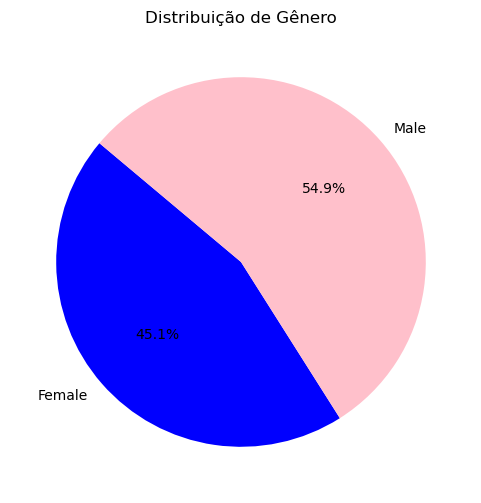

In [69]:
# Criando um gráfico de pizza para clientes M e F da França
grupo_por_genero = df_france.groupby('Gender').size()
plt.figure(figsize=(6, 6))
plt.pie(grupo_por_genero, labels=grupo_por_genero.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Distribuição de Gênero')
plt.show()

### 2.2 - Criando um dataframe da Espanha.

In [68]:
# Criando um dataframe da Espanha
df_spain = df1[df1['Geography'] == 'Spain'].copy()
df_spain

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary
1,15647311,608,Spain,Female,41,112542.58
4,15737888,850,Spain,Female,43,79084.10
5,15574012,645,Spain,Male,44,149756.71
11,15737173,497,Spain,Male,24,76390.01
14,15600882,635,Spain,Female,35,65951.65
...,...,...,...,...,...,...
9966,15590213,479,Spain,Male,35,20393.44
9980,15719276,741,Spain,Male,35,99595.67
9987,15588839,606,Spain,Male,30,1914.41
9989,15605622,841,Spain,Male,28,179436.60


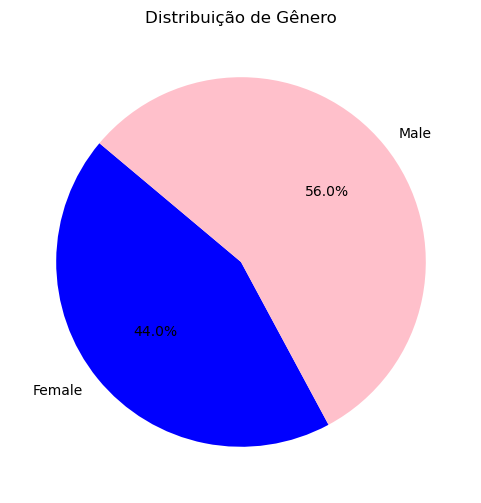

In [71]:
# Criando um gráfico de pizza para clientes M e F da Espanha
grupo_por_genero = df_spain.groupby('Gender').size()
plt.figure(figsize=(6, 6))
plt.pie(grupo_por_genero, labels=grupo_por_genero.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Distribuição de Gênero')
plt.show()

### 2.3 - Criando um dataframe da Alemanha.

In [73]:
df_germany = df1[df1['Geography'] == 'Germany'].copy()
df_germany

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary
7,15656148,376,Germany,Female,29,119346.88
15,15643966,616,Germany,Male,45,64327.26
16,15737452,653,Germany,Male,58,5097.67
26,15736816,756,Germany,Male,36,170041.95
28,15728693,574,Germany,Female,43,100187.43
...,...,...,...,...,...,...
9982,15768163,655,Germany,Female,46,115146.40
9984,15696175,602,Germany,Male,35,51695.41
9986,15581736,673,Germany,Male,47,34047.54
9990,15798964,714,Germany,Male,33,53667.08


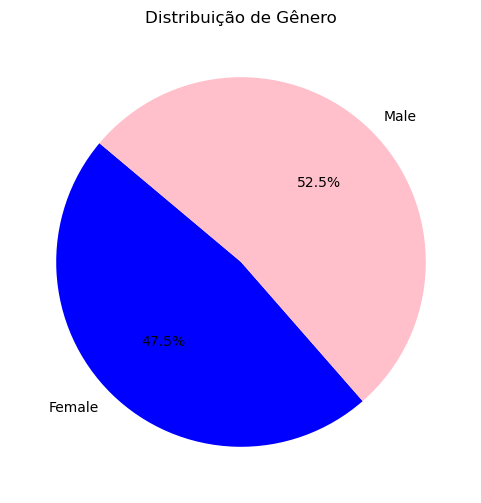

In [75]:
# Criando um gráfico de pizza para clientes M e F da Espanha
grupo_por_genero = df_germany.groupby('Gender').size()
plt.figure(figsize=(6, 6))
plt.pie(grupo_por_genero, labels=grupo_por_genero.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Distribuição de Gênero')
plt.show()

### 3 - Qual faixa etária tem o maior score de crédito envolvendo todos os países.

In [77]:
# Criando as faixas etárias
faixas_etarias = [
    ('Abaixo de 25 anos', (0, 25)),
    ('De 25 a 30 anos', (25, 30)),
    ('De 31 a 35 anos', (31, 35)),
    ('De 36 a 40 anos', (36, 40)),
    ('De 41 a 45 anos', (41, 45)),
    ('Acima de 46 anos', (46, 200))
]

# Adicionando uma nova coluna ao dataframe com a faixa etária correspondente
df1['Faixa Etária'] = pd.cut(df1['Age'], bins=[start for _, (start, _) in faixas_etarias] + [200], labels=[faixa for faixa, _ in faixas_etarias])

# Agrupando os dados por faixa etária e calculando a média do CreditScore
media_scores_por_faixa = df1.groupby('Faixa Etária')['CreditScore'].mean()

# Encontrando a faixa etária com a maior média do CreditScore
faixa_maior_media = media_scores_por_faixa.idxmax()

print("Faixa etária com maior média do CreditScore:", faixa_maior_media)

Faixa etária com maior média do CreditScore: De 36 a 40 anos


Faixa etária com maior média do CreditScore: De 36 a 40 anos